In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pprint

import sys
import os

sys.path.append(os.path.abspath('..'))

from SafeRLBench import config
from SafeRLBench import Bench, BenchConfig, BestPerformance
from SafeRLBench.algo import PolicyGradient
from SafeRLBench.envs import LinearCar, GeneralMountainCar
from SafeRLBench.policy import LinearPolicy, NoisyLinearPolicy
from SafeRLBench.spaces import BoundedSpace
from SafeRLBench import SRBConfig

import logging
    
np.set_printoptions(precision=5)

In [2]:
config.logger_set_level(logging.DEBUG)
config.logger_add_stream_handler()
# config.logger_add_file_handler('BenchTestLog.log')
config.monitor_set_verbosity(2)
config.jobs_set(1)

In [3]:
# configure policy
policy = LinearPolicy(2, 1)
noisy_policy = NoisyLinearPolicy(2, 1, sigma=1)
noisy_policy.parameter_space = BoundedSpace(-1, 1, (3,))

# configure environments
algs = [
    (PolicyGradient, [#{'policy': noisy_policy, 'max_it': 500, 'eps': 0.0000000001, 'estimator': 'reinforce', 'rate': 4, 'var': 0.5},
                      {'policy': policy, 'max_it': 500, 'eps': 0.0000001, 'estimator': 'central_fd', 'var': 5}])
]

env = [[
    (LinearCar, {'horizon': 100})
]]


test_config = BenchConfig(algs, env)

In [4]:
benchmark = Bench(test_config, [BestPerformance()])

In [5]:
benchmark()

4871 - 2017-02-01 15:10:08,392 - SafeRLBench.bench - DEBUG - Starting benchmarking.
4871 - 2017-02-01 15:10:08,401 - SafeRLBench.bench - DEBUG - DISPATCH RUN:

   Algorithm:   
     PolicyGradient  
    {  eps : 1e-07 
       estimator :  central_fd  
       max_it : 500 
       policy : <SafeRLBench.policy.linear_policy.LinearPolicy object at 0x10adc5908> 
       var : 5}  
   Environment:   
    LinearCar   { horizon : 100}  

4871 - 2017-02-01 15:10:08,406 - SafeRLBench.monitor - INFO - Starting optimization of PolicyGradient...
4871 - 2017-02-01 15:10:14,498 - SafeRLBench.monitor - INFO - Status for PolicyGradient on LinearCar:

	Run: 100	Time: 6.09	 Avg: 0.061
	Parameter: 	[ 0.41223  0.72384  0.95705]
	Gradient: 	[-0.00513 -0.04819  0.01482]



KeyboardInterrupt: 

In [ ]:
benchmark.measures[0].result

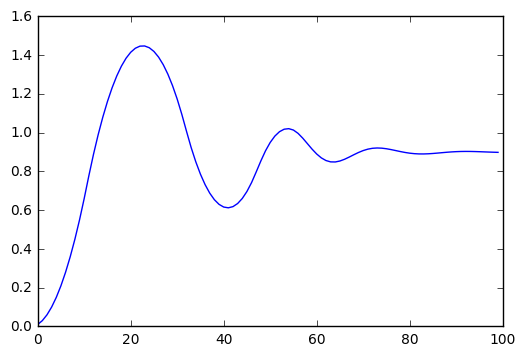

In [7]:
monitor = benchmark.measures[0].result[0][0].get_alg_monitor()
rewards = monitor.rewards
traces = monitor.traces

trace = traces[rewards.index(max(rewards))]
y = [t[1][0] for t in trace]
x = range(len(y))

plt.plot(x, y)
plt.show()

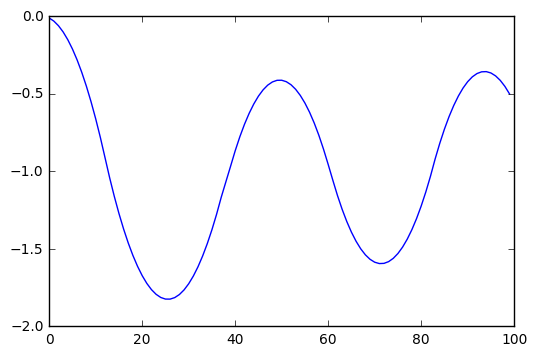

In [8]:
monitor = benchmark.measures[0].result[1][0].get_alg_monitor()
rewards = monitor.rewards
traces = monitor.traces

trace = traces[rewards.index(max(rewards))]
y = [t[1][0] for t in trace]
x = range(len(y))

plt.plot(x, y)
plt.show()